# -------------------------------------------Mini project-------------------------------------------

# ---------------------------------------Mall Customers Data---------------------------------------

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

# Loading Data

In [2]:
df=pd.read_csv("DS3_C6_S3_MallCustomers_Data_Project.csv")

# Insights from data

In [3]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
129,130,Male,38,71,75
34,35,Female,49,33,14
167,168,Female,33,86,95
193,194,Female,38,113,91
84,85,Female,21,54,57


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print("Data has ",df.shape[0], " rows and",df.shape[1],"columns")

Data has  200  rows and 5 columns


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Null Value Treatmemnt

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Interpretation:- No Null values are present

# Visualisation

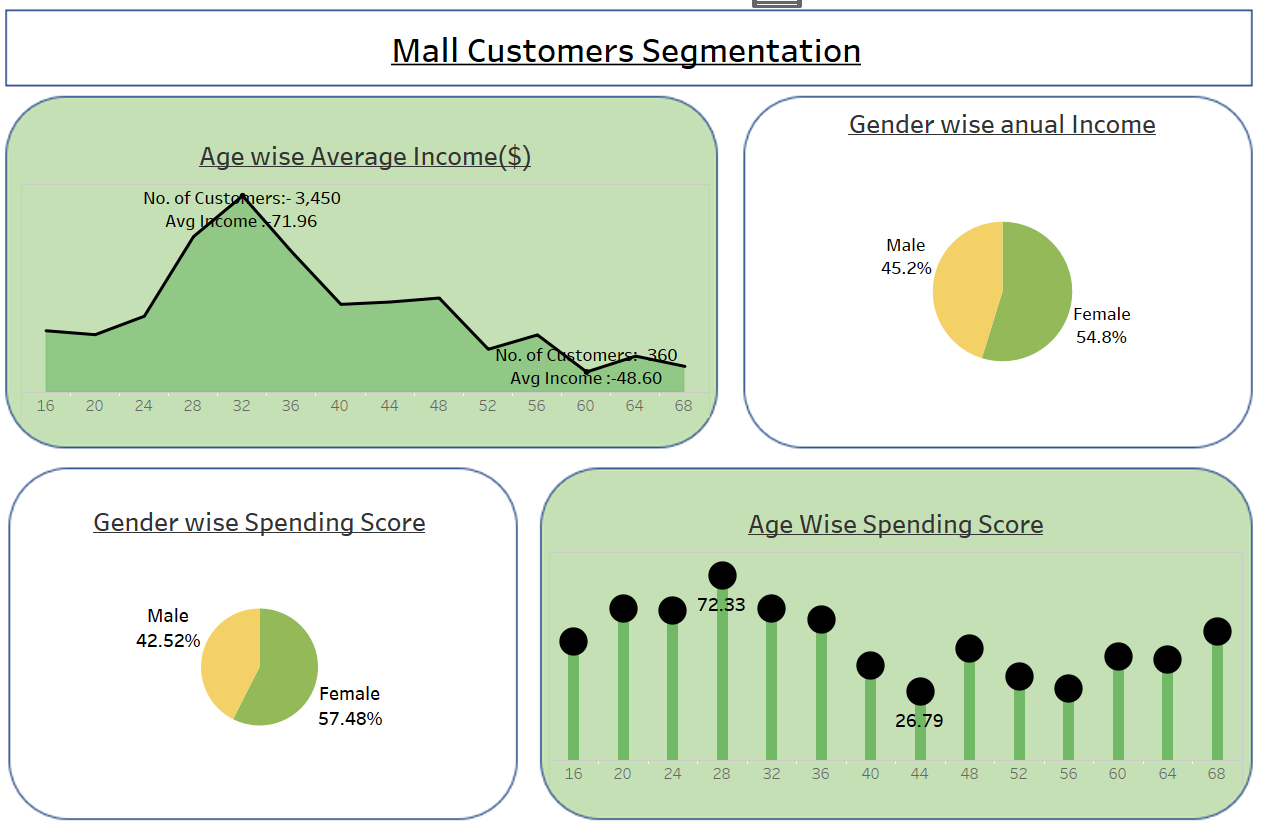

Business Interpretation:- 
    
As per the above Dashboard Age group from 34-40 has the highest average income and their spending score is more.
    
Furthermore, gender wise females earns more than males and they spend more

# Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])

Interpretation:- Converted categorical to numerical using sklearn Label encoder

In [10]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]


# Scaling the data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X= scaler.fit_transform(X)

In [12]:
X = pd.DataFrame(X)

Interpretation:- standardize the independent features in a fixed range using standard scaler

# Model - K-Mean

Finding a good K for the model

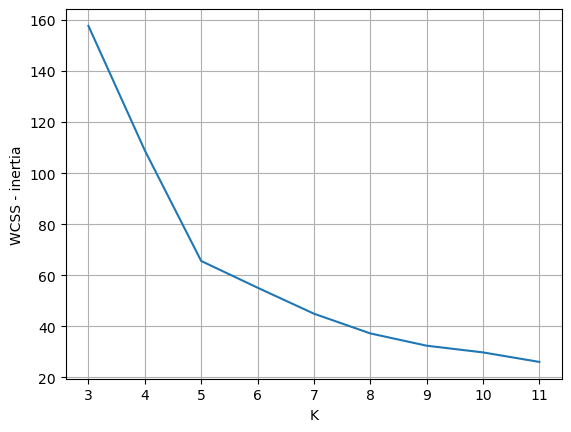

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
WCSS = []
for k in range(3, 12):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    WCSS.append(kmeans_model.inertia_)

plt.plot(range(3, 12), WCSS)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('WCSS - inertia')
plt.show()

Interpretation:- Elbow method shows that K=5 is the optimum value

For n_clusters = 3 The average silhouette_score is : 0.46658474419000145
For n_clusters = 4 The average silhouette_score is : 0.4939069237513199
For n_clusters = 5 The average silhouette_score is : 0.5546571631111091
For n_clusters = 6 The average silhouette_score is : 0.5377141165734254
For n_clusters = 7 The average silhouette_score is : 0.45298064520649645
For n_clusters = 8 The average silhouette_score is : 0.4550112502601921
For n_clusters = 9 The average silhouette_score is : 0.45435433918236995
For n_clusters = 10 The average silhouette_score is : 0.4505029621610447
For n_clusters = 11 The average silhouette_score is : 0.4364474909579185
For n_clusters = 12 The average silhouette_score is : 0.42033473615949973
For n_clusters = 13 The average silhouette_score is : 0.41314899745507183
For n_clusters = 14 The average silhouette_score is : 0.4292630037951905


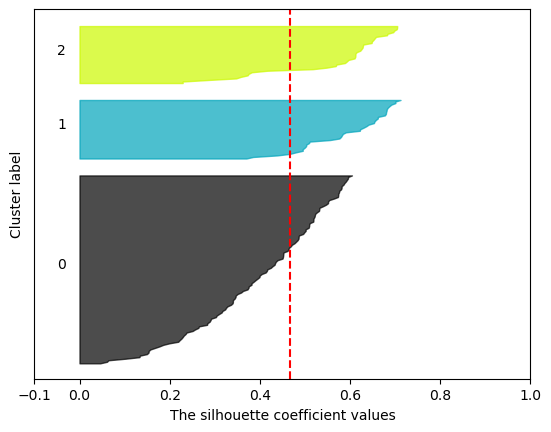

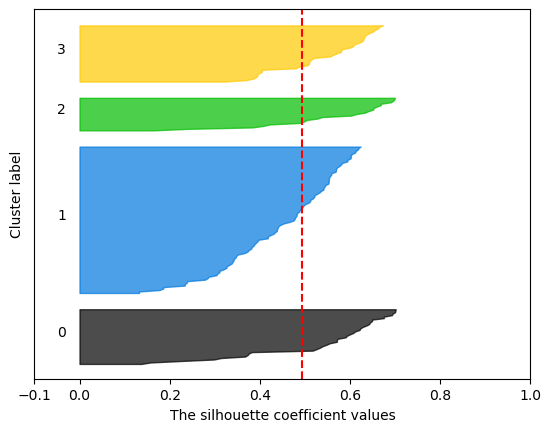

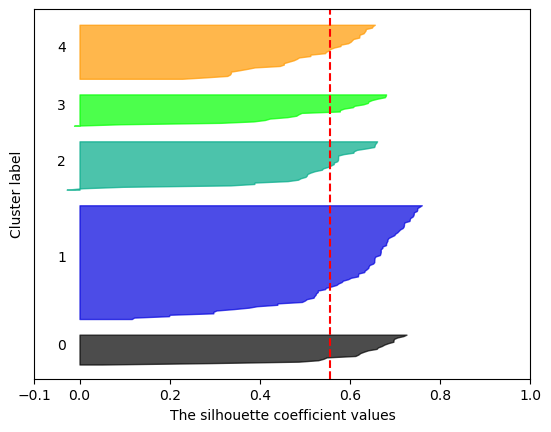

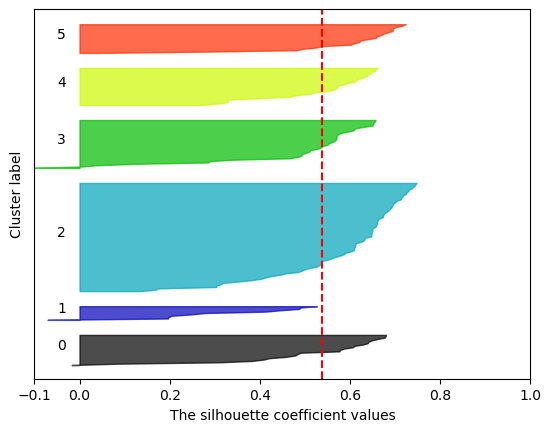

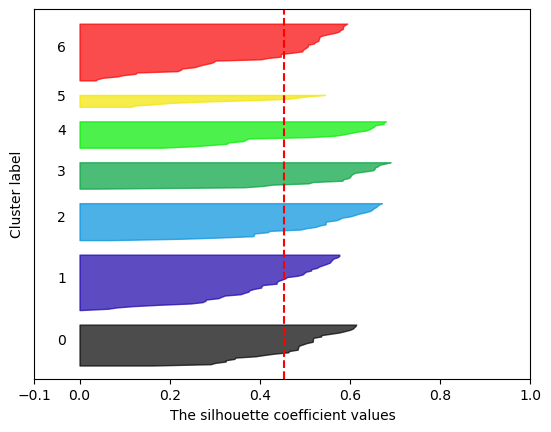

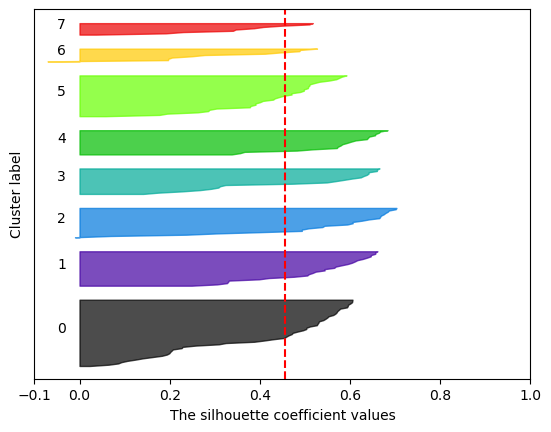

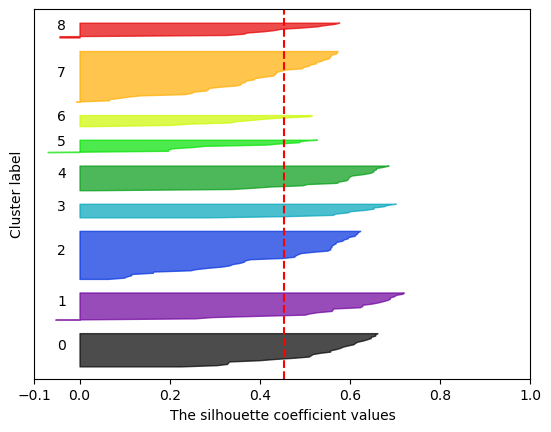

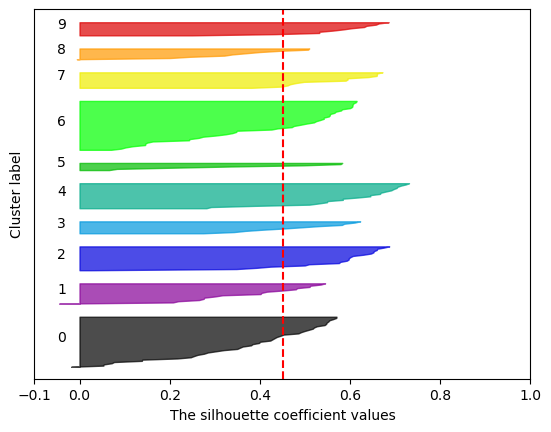

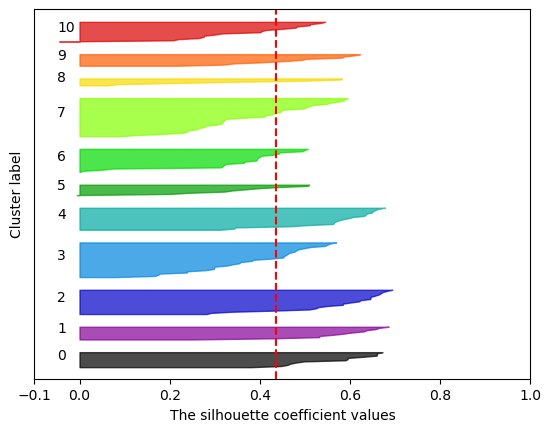

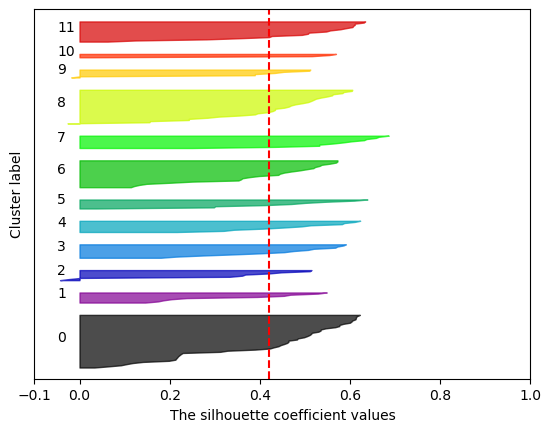

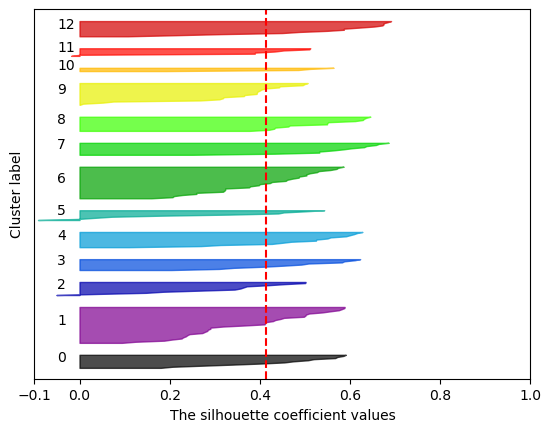

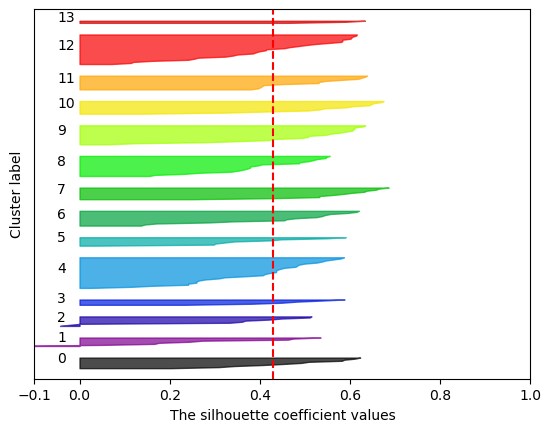

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
#range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range(3,15):
 # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
 # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
 # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

Interpretation:- silhouette method also shows that K=5 is the optimum value

Model building and fitting

In [15]:
from sklearn.cluster import KMeans
Kmeans_model = KMeans(n_clusters=5)
Kmeans_model.fit(X)
K_label = Kmeans_model.labels_
X["k_labels"]= Kmeans_model.labels_

In [16]:
c_centroid = Kmeans_model.cluster_centers_
c_centroid

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788]])

In [17]:
predict=Kmeans_model.fit_predict(X)
predict

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Interpretation:- Model fitted and for 5 clusters 5 centroids are obtained

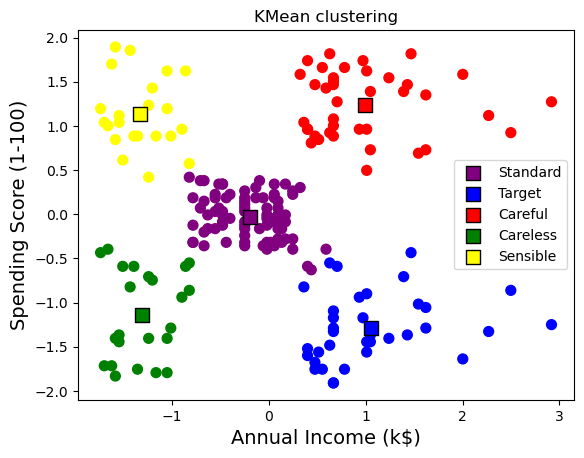

In [36]:
import matplotlib
import matplotlib.pyplot as plt
colors = ["purple","red",'blue','green','yellow']
plt.scatter(X[0],X[1],c=X["k_labels"],cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.scatter(-0.20091257, -0.02645617, marker='s',c="purple",s=100,edgecolor='black',label = 'Standard')
plt.scatter(1.05500302, -1.28443907, marker='s',c='blue',s=100,edgecolor='black',label = 'Target')
plt.scatter( 0.99158305,  1.23950275, marker='s',c='red',s=100,edgecolor='black',label = 'Careful')
plt.scatter(-1.30751869, -1.13696536, marker='s',c='green',s=100,edgecolor='black',label = 'Careless')
plt.scatter(-1.32954532,  1.13217788, marker='s',c='yellow',s=100,edgecolor='black',label = 'Sensible')
plt.title("KMean clustering")
plt.xlabel("Annual Income (k$)", fontsize= 14)
plt.ylabel("Spending Score (1-100)", fontsize= 14)
plt.legend()
plt.show()

Interpretation:- K mean Clustering detect the clusters perfectly

# Model- Agglomerative Clustering

finding the best k value using dendogram

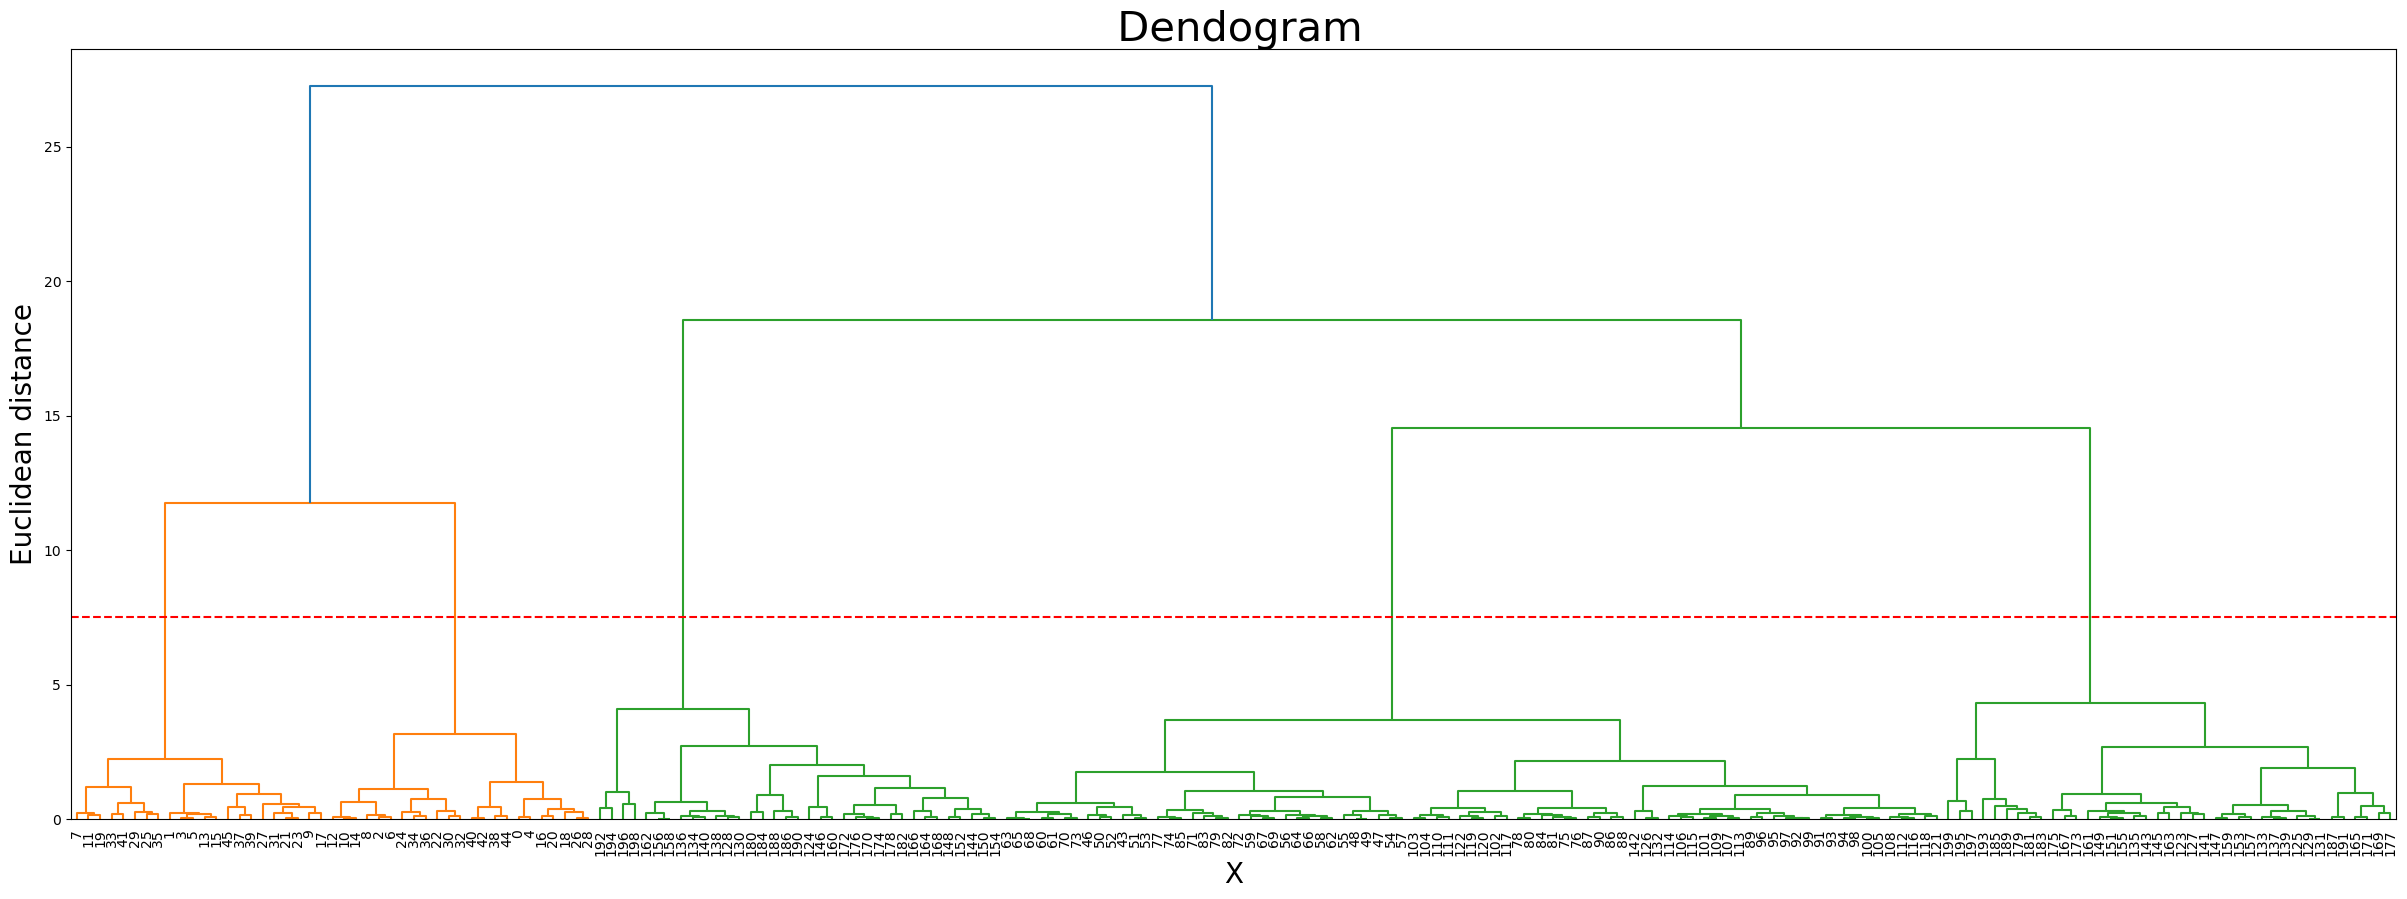

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(30,10))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=7.5,color='r',linestyle = "--")
ax=plt.gca()
ax.tick_params(axis = 'x',which='major',labelsize =10)
plt.title(" Dendogram", fontsize=30)
plt.xlabel("X",fontsize=20)
plt.ylabel("Euclidean distance",fontsize=20)
plt.show()

 Interpretation:- By cutting the dendogram on y = 7.5, we are obtaining 5 clusters

Model building and fitting

In [20]:
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage='ward')
y_hc=hc.fit_predict(X)
cluster_labels=hc.fit_predict(X)
X["agg_labels"]= cluster_labels


In [21]:
y_hc

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

ploting the scatter plot

In [25]:
X1=np.array(X)

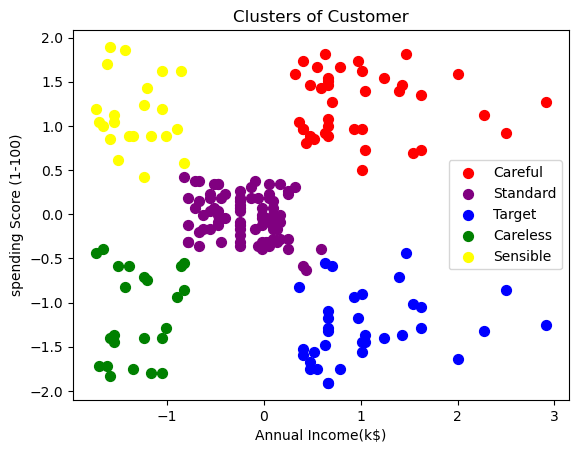

In [37]:
plt.scatter(X1[y_hc == 0,0],X1[y_hc == 0,1],s=50,c='red', label = 'Careful')
plt.scatter(X1[y_hc == 1,0],X1[y_hc == 1,1],s=50,c='purple', label = 'Standard')
plt.scatter(X1[y_hc == 2,0],X1[y_hc == 2,1],s=50,c='blue', label = 'Target')
plt.scatter(X1[y_hc == 3,0],X1[y_hc == 3,1],s=50,c='green', label = 'Careless')
plt.scatter(X1[y_hc == 4,0],X1[y_hc == 4,1],s=50,c='yellow', label = 'Sensible')
plt.title("Clusters of Customer")
plt.xlabel("Annual Income(k$)")
plt.ylabel("spending Score (1-100)")
plt.legend()
plt.show()

Interpretation:- Agglomnerating clustering is segregate the clusters well

# Model- DBSCAN

Plot K-distance graph to evaluate the optimum ens value

In [29]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors= 2)
nbrs = neigh.fit(X[[0,1]])
distances, indices = nbrs.kneighbors(X[[0,1]])

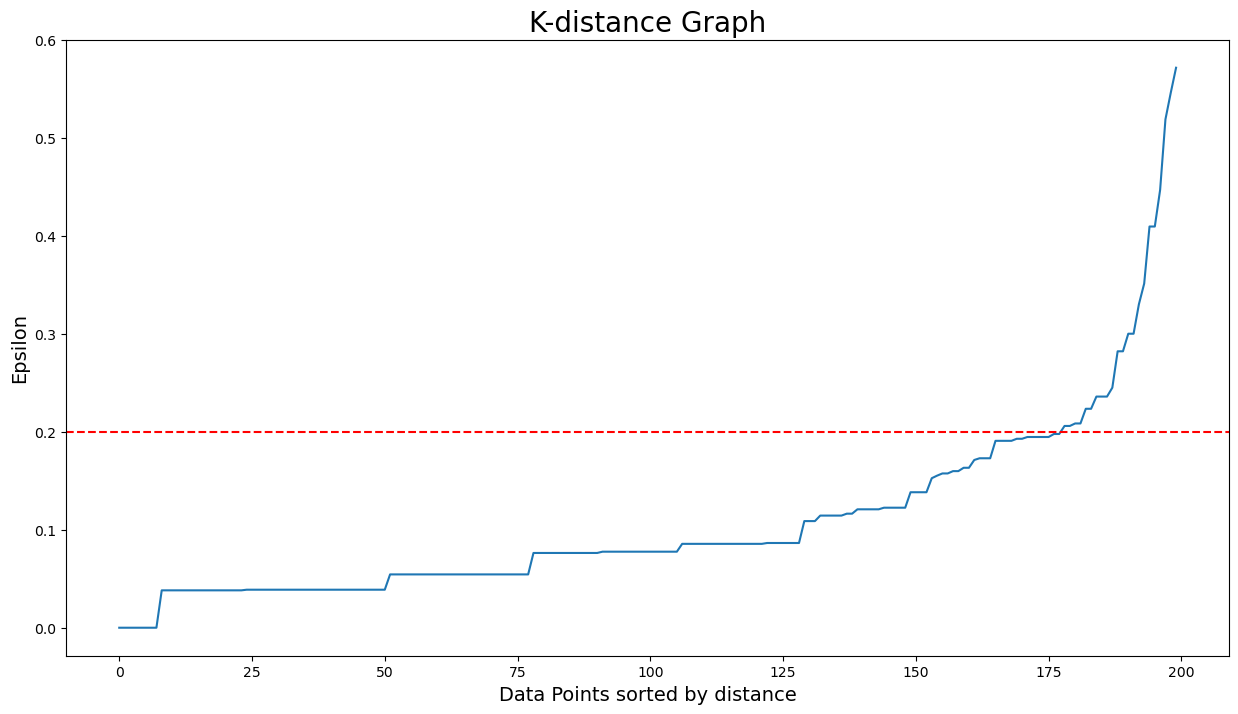

In [30]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.2, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Interpretation:- the best epsilon value is 0.2

Model building and fitting

In [31]:
from sklearn.cluster import DBSCAN
dbscan_opt = DBSCAN(eps= 0.2, min_samples=5)
dbscan_opt.fit(X[[0,1]])

X["DBSCAN_opt_labels"]= dbscan_opt.labels_


Ploting the scatter plot

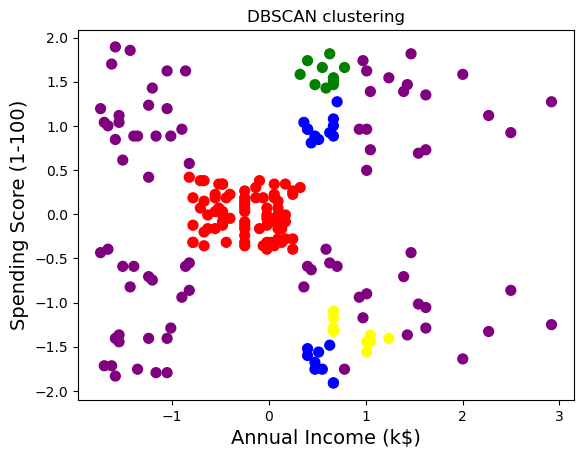

In [38]:
colors = ["purple","red",'blue','green','yellow']

plt.scatter(X[0],X[1],c=X["DBSCAN_opt_labels"],cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title("DBSCAN clustering")
plt.xlabel("Annual Income (k$)", fontsize= 14)
plt.ylabel("Spending Score (1-100)", fontsize= 14)
plt.show()

DBSCAN model is not detecting the clusters well because of less no of data

# Interpretation:- Overall, K-Means and Agglomerative clustering model is segregating the cluster well and can be used for predicting the future outcome.